In [19]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats as stats
import pandas as pd

In [20]:
movie = pd.read_csv("../Resources/US_movies_cleanup.csv")
#drop un-needed columns
movie_imdb1 = movie.drop(columns=["Unnamed: 0","Title","Runtime (mins)","Year","Release Date","Num Votes",
                                 "Rotten Tomatoes Rating","Metascore","Genre","Rated","Production",
                                 "Director","Actor"], axis=1)


#drop rows with no values
rating_imdb = movie_imdb1.dropna()
rating_imdb.head(10)

,IMDb Rating,Box Office
1,6.6,"$183,277,573"
4,8.5,"$2,925,880"
8,8.1,"$45,299,680"
9,8.5,"$94,240,635"
16,6.5,"$431,000,000"
18,7.4,"$156,164,829"
19,7.6,"$317,557,891"
20,8.8,"$314,000,000"
21,8.7,"$339,700,000"
22,5.9,"$141,134,092"


In [21]:
#create IMDB data frame of "Good" movies
imdb_good = rating_imdb[(rating_imdb["IMDb Rating"]>=7)]
imdb_goodbox = imdb_good.drop(["IMDb Rating"], axis=1)

#remove currency symboal and convert box-office to float
clean_imdbgood = imdb_goodbox["Box Office"].replace('[\$,]', '', regex=True).astype(float)
clean_imdbgood.head(10)

4       2925880.0
8      45299680.0
9      94240635.0
18    156164829.0
19    317557891.0
20    314000000.0
21    339700000.0
23    380529370.0
24    364000000.0
25     84136909.0
Name: Box Office, dtype: float64

In [22]:
#create IMDB data frame of "Not Good" movies
imdb_notgood = rating_imdb[(rating_imdb["IMDb Rating"]<7)]
imdb_badbox = imdb_notgood.drop(["IMDb Rating"], axis=1)
#imdb_badbox.head(10)

clean_imdbbad = imdb_badbox["Box Office"].replace('[\$,]', '', regex=True).astype(float)
clean_imdbbad.head(10)

1     183277573.0
16    431000000.0
22    141134092.0
37    168400000.0
39    150167630.0
45    179737340.0
47    166112167.0
50    162001186.0
57    172051787.0
63    241063875.0
Name: Box Office, dtype: float64

In [23]:
#compare the 2 groups T-test

(t_stat, p) = stats.ttest_ind(clean_imdbgood, clean_imdbbad, equal_var=False)

print(clean_imdbgood.mean())
print(clean_imdbbad.mean())

print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

66216786.460299194
39271056.88639761
t-statistics is 7.198554674634999.
p-value is 1.1480185333936805e-12.


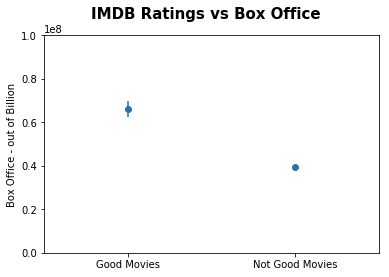

In [24]:
# Plot sample means with error bars
tick_labels = ["Good Movies", "Not Good Movies"]

means = [clean_imdbgood.mean(), clean_imdbbad.mean()]
x_axis = np.arange(0, len(means))

sem = [clean_imdbgood.sem(), clean_imdbbad.sem()]

# Plot mean height of players
fig, ax = plt.subplots()

fig.suptitle("IMDB Ratings vs Box Office",
             fontsize=15, fontweight="bold")

ax.errorbar(x_axis, means, yerr=sem, fmt="o")

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 100000000)

ax.set_xticklabels(tick_labels)
ax.set_xticks([0, 1])

ax.set_ylabel("Box Office - out of Billion")

plt.show()

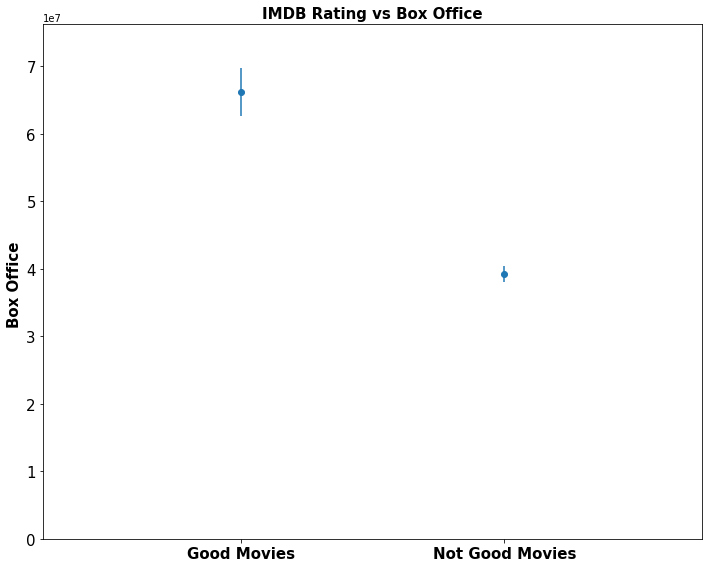

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))

boxoffice_mean = [66216786, 39271056]
x_axis = np.arange(len(boxoffice_mean))
sem = [clean_imdbgood.sem(), clean_imdbbad.sem()]
ax.errorbar(x_axis, means, yerr=sem, fmt="o")

# plt.bar(x_axis, boxoffice_mean, color='g', alpha=0.8, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Good Movies", "Not Good Movies"], size=15, weight="bold")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(boxoffice_mean)+10000000)

# Give our chart some labels and a tile
plt.title("IMDB Rating vs Box Office",size=15, weight="bold")
plt.ylabel("Box Office ", size=15, weight="bold")

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.savefig("../Figures/IMDB_vs_BoxOffice.png")


[66.21678646029919, 39.27105688639761]